# Control theory. Course introduction.

## TP1. System modeling. State-space representation of dynamical systems.

## Study load

Course grade breakdown:

    Labs - 40%
    
    Final project presentation 30%

    Final test 30%
    
File name for lab submission: yourname_labnumber.ipynb (example: elenavanneaux_TP1.ipynb)    

The completed notebooks should be **submitted via the corresponding Moodle assignments before the beginning of the next session.**

## Prerequisites for practice
### Math
During the course, we will cover the following areas of mathematics:
    
    1. Linear Algebra

    2. Calculus

    3. Differential equations

    4. Dynamics (Mechanics and Physics)

### Python programming
In the labs we will use a Python programming language and the following libraries:

    1. NumPy https://numpy.org/doc/stable/

    2. SciPy https://docs.scipy.org/doc/scipy/

    3. Matplotlib https://matplotlib.org/stable/tutorials/index

    4. SymPy https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html

### Jupyter Notebook Markdown Cells Documentation

Please check on Markdown cells documentation, to provide a fancy look for your notebooks!

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

## Ex.1: Vehicle Suspension System

Vehicle Suspension System

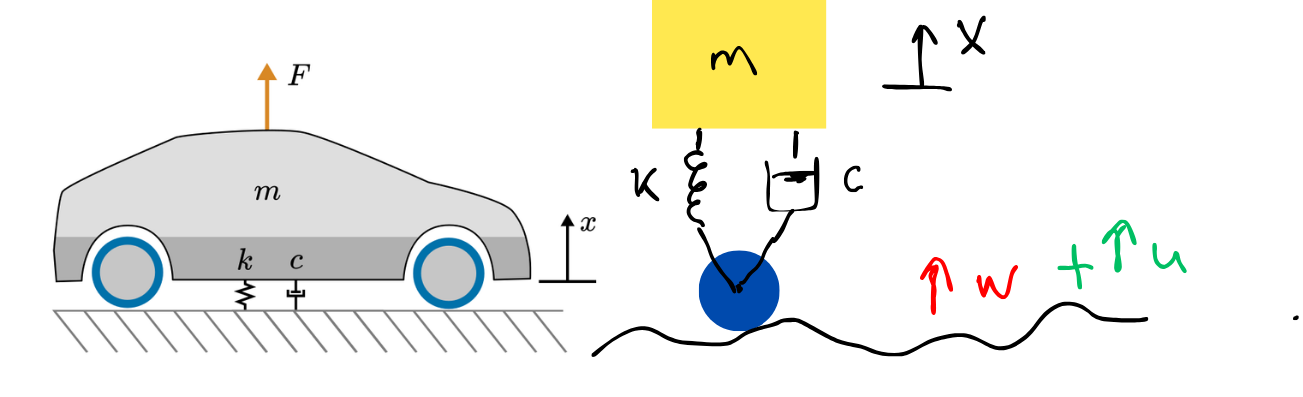

with the following system parameters:

    (m) mass 1.0 kg

    (k) spring constant 5.0 N/m

    $(c)$ damping constant 2 Ns/m

### **Equation of Motion:**

For a mass-spring-damper system, the equation of motion can be derived using Newton's second law or by applying the principles of dynamics. The general form of the equation is:

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = u + w
$$

### **State-Space Representation:**

To convert the second-order differential equation into a system of first-order differential equations, we introduce the following state variables:
- Let $ x_1 = x $ (position),
- Let $ x_2 = \dot x $ (velocity).

The system becomes:

$$\dot x = Ax+Bu+Dw$$

where
state vector $x = (position, velocity)$, and state and control matrices are the following:
$$ A = \begin{pmatrix} 0&1\\ -\frac{k}{m}&-\frac{c}{m}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix},\ D =\begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix}$$

## TODO

Today we will study the dynamic of a passive suspension system, i.e. we assume that there is no active control ($u =0,$ for all $t>0$). 

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x is a state vector, t is a current time, A is a dynamic matrix, B is a control matrix, D is a disturbance matrix, 
# u_func(t) is a control input, w_func(t) is a disturbance input 
def StateSpace(x, t, A, B, D, u_func, w_func):
    w = w_func(t)
    u = u_func(t)
    # Flatten u and w for proper matrix operations
    return np.dot(A, x) + np.dot(B, u).flatten() + np.dot(D, w).flatten()

# OpenLoopInputOutputSystem with time-dependent w(t)
def OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0):
    # Solve the ODE system with odeint, passing the time-dependent w function
    solution = odeint(StateSpace, x0, T, args=(A, B, D, u_func, w_func))
    # Output calculation using C and the solution
    return (C @ solution.T)    

1. Check on the code below, what kind of situation does it model? 
ANSWER: It's mass-spring-damp system.

Modify the code below to analyse how the suspension system will work on different roads.

2. Let disturbance input $w(t)$ be given by a step function
    $$w = \left\{\begin{aligned}
        &0, \quad t <3.0\\
        &1.0,  \quad 3.0 \leq t < 7.0\\
        &0,  \quad t \geq 7
    \end{aligned}\right.$$
   How will it affect the behavior of the system? What kind of road scenario is modeled with step function disturbance?

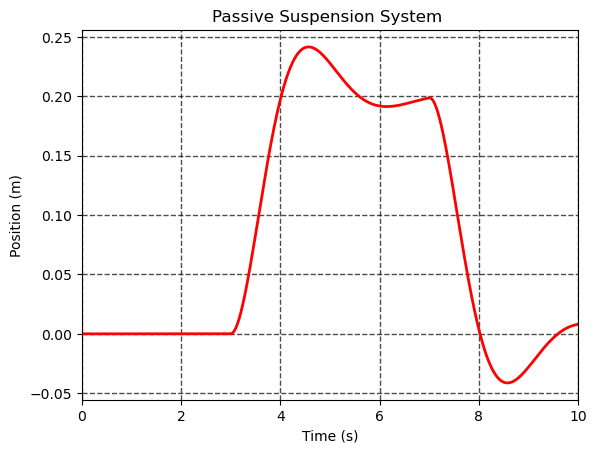

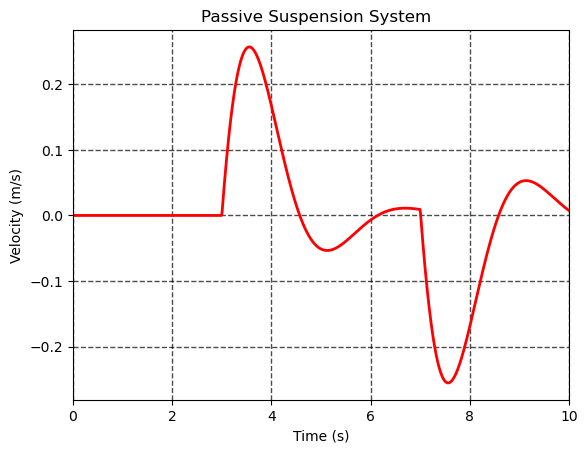

In [13]:
# System parameters
m = 1
k = 5
c = 2
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    if 3 <= t < 7: # ANSWER: Code adapted to include disturbance between t=3s and t=7s
        return 1.0 # Disturbance input
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

3. How will the system behavior change when we assume that there is no damper in the system (i.e., c=0)?

ANSWER: Without the damper the oscilations won't decrease over time.

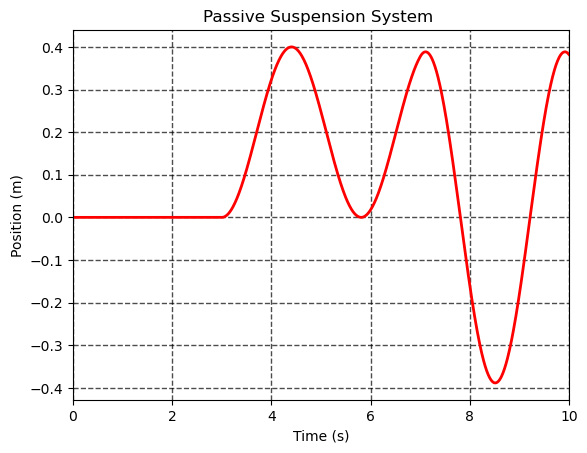

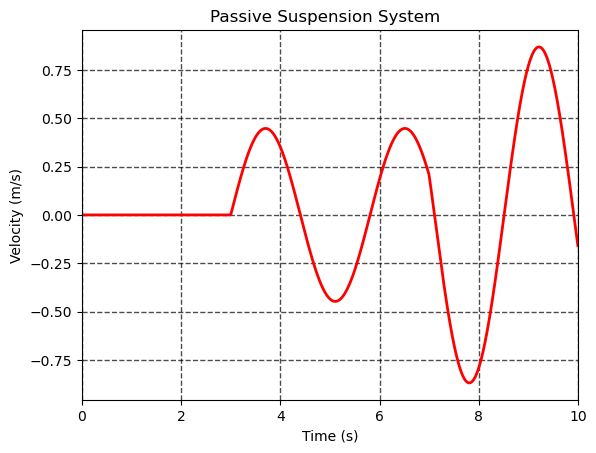

In [14]:
# System parameters
m = 1
k = 5
c = 0
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    if 3 <= t < 7:
        return 1.0 # Disturbance input
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

4. Now assume that the system is disturbed by a sinusoidal input $w = sin(t)$.
   How will it affect the behavior of the system? What kind of road profile does a sinusoidal input describe?

ANSWER: The system will be affected by a continuous oscilation, so it'll have two outputs, first, a transient one, at the begginning of the perturbation and a steady one after the system stabilizes at the frequency of the external force. It describes an uneven road.

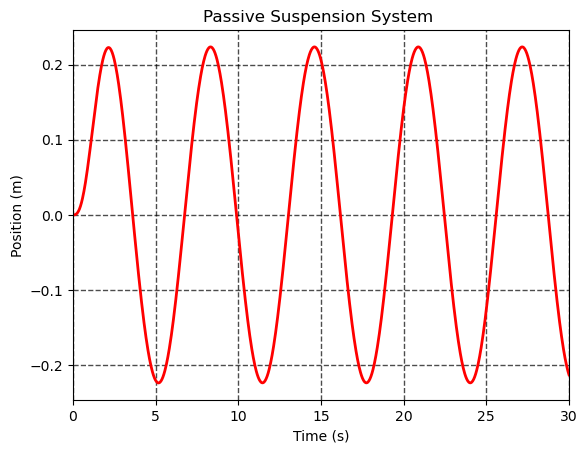

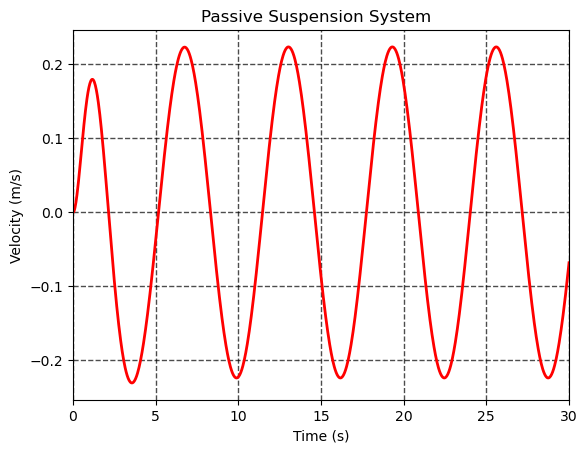

In [15]:
# System parameters
m = 1
k = 5
c = 2
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 30  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return np.sin(t) # ANSWER: Disturbance input changed to a sine wave
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

## Ex.2: DC Motor Speed: System Modeling

A common actuator in control systems is the DC motor. It directly provides rotary motion and, coupled with wheels or drums and cables, can provide translational motion. The electric equivalent circuit of the armature and the free-body diagram of the rotor are shown in the following figure.

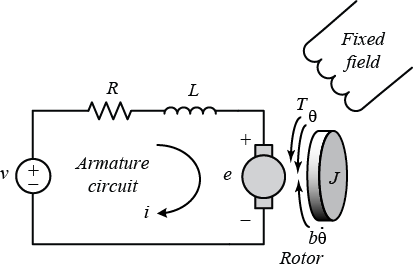

For this example, we will assume that the input of the system is the voltage source ($V$) applied to the motor's armature, while the output is the rotational speed of the shaft $\dot{\theta}$. The rotor and shaft are assumed to be rigid. We further assume a viscous friction model, that is, the friction torque is proportional to shaft angular velocity. We will assume that the magnetic field is constant and, therefore, that the motor torque is proportional (with constant $K_t$) to only the armature current. Let us remark that in SI units the motor torque and back emf constants are equal, that is, $K_t = K_e$.

The physical parameters for our example are:

    (J)   moment of inertia of the rotor     0.01 kg.m^2

    (b)     motor viscous friction constant    0.1 N.m.s

    (Ke)    electromotive force constant       0.01 V/rad/sec

    (Kt)    motor torque constant              0.01 N.m/Amp

    (R)     electric resistance                1 Ohm

    (L)     electric inductance                0.5 H


## TODO
1. Let us assume that the state vector is $x = (w,i)$ where $w = \dot\theta$ is an angular velocity of the motor. Derive the state space equations of the system. Is the system linear?

### ANSWER

By applying Kirchhoff's Voltage Law to the armature circuit and Newton's Second Law to the rotor, we obtain the following differential equations:

$v = Ri + L\frac{di}{dt} + k_e\dot{\theta} \quad \Rightarrow \quad \frac{di}{dt} = -\frac{R}{L}i - \frac{k_e}{L}\dot{\theta} + \frac{1}{L}v$

$J\ddot{\theta} + b\dot{\theta} = k_t i \quad \Rightarrow \quad \ddot{\theta} = \frac{k_t}{J}i - \frac{b}{J}\dot{\theta}$

Is the system linear? Yes.
The system is described by linear ordinary differential equations (ODEs) where the state variables and input appear only to the first power with constant coefficients. It satisfies the principle of superposition.

2. Rewrite the system equations in canonical first order ODE system form.

Defining the state vector as $x = [\dot{\theta}, i]^T$ (angular velocity and current) and input $u = [v]$, the system can be written in matrix form $\dot{x} = Ax + Bu$:

$$
\begin{bmatrix}
\ddot{\theta} \\
\frac{di}{dt}
\end{bmatrix} =
\begin{bmatrix}
-\frac{b}{J} & \frac{k_t}{J} \\
-\frac{k_e}{L} & -\frac{R}{L}
\end{bmatrix}
\begin{bmatrix}
\dot{\theta} \\
i
\end{bmatrix} +
\begin{bmatrix}
0 \\
\frac{1}{L}
\end{bmatrix}
v
$$

3. Simulate the output of the system corresponding to uncontrolled system (i.e V = 0) and a random initial position.

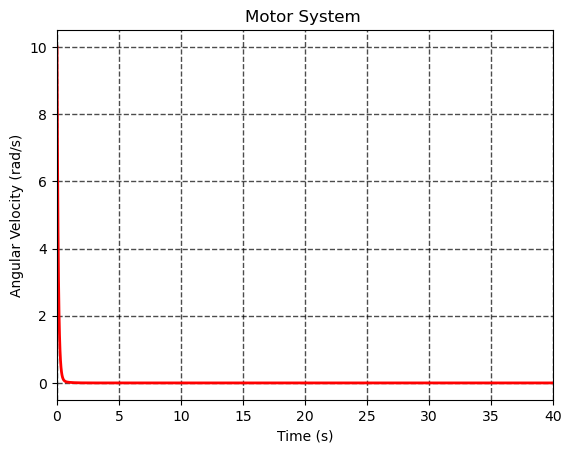

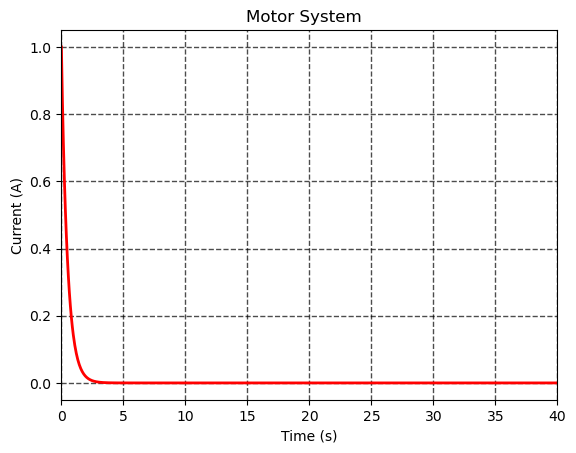

In [16]:
# System parameters
J = 0.01    # moment of inertia of the rotor 
b = 0.1     # motor viscous friction constant 
Ke = 0.01   # electromotive force constant 
Kt = 0.01   # motor torque constant
R = 1       # electric resistance 
L = 0.5     # electric inductance

A = np.array([[-b/J, Kt/J],
              [-Ke/L, -R/L]])

B = np.array([[0],
              [1/L]])  # Reshaped to column vector

D = np.array([[0],
              [0]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output masrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([10, 1]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 40  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Motor System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Current (A)')
plt.xlabel('Time (s)')
plt.title('Motor System  ')
plt.show()

4. Let's assume that the motor is off. How will the system's behavior change if we apply 15 volts as an input?

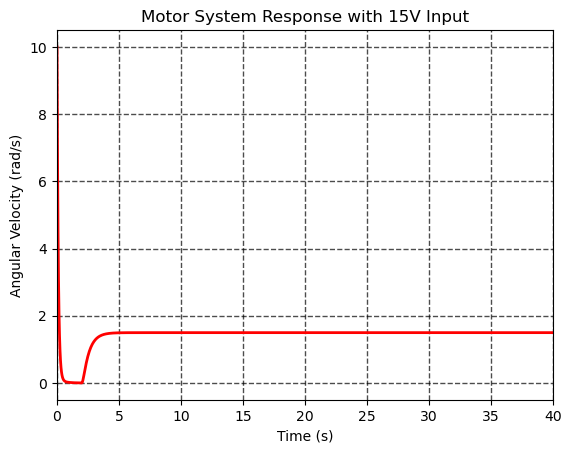

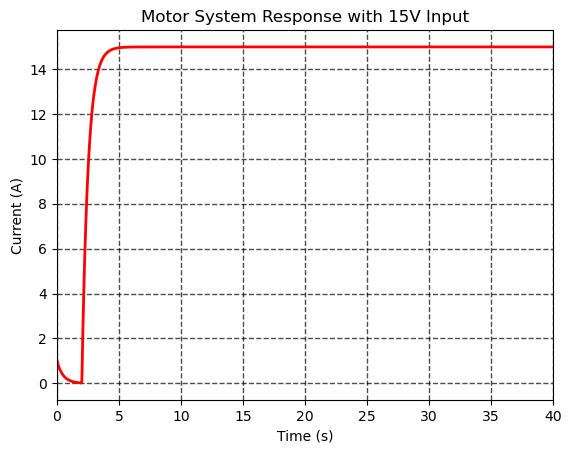

In [17]:
# System parameters
J = 0.01    # moment of inertia of the rotor 
b = 0.1     # motor viscous friction constant 
Ke = 0.01   # electromotive force constant 
Kt = 0.01   # motor torque constant
R = 1       # electric resistance 
L = 0.5     # electric inductance

A = np.array([[-b/J, Kt/J],
              [-Ke/L, -R/L]])

B = np.array([[0],
              [1/L]])  # Reshaped to column vector

D = np.array([[0],
              [0]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output masrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([10, 1]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 40  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    if t <= 2:
        return 0.0 # Control input set to 0V for first 2 seconds
    return 15.0 # ANSWER: Control input set to 15V

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Motor System Response with 15V Input')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Current (A)')
plt.xlabel('Time (s)')
plt.title('Motor System Response with 15V Input')
plt.show()

## Ex.3: Pendulum

Let us now consider the pendulum example from the lecture.

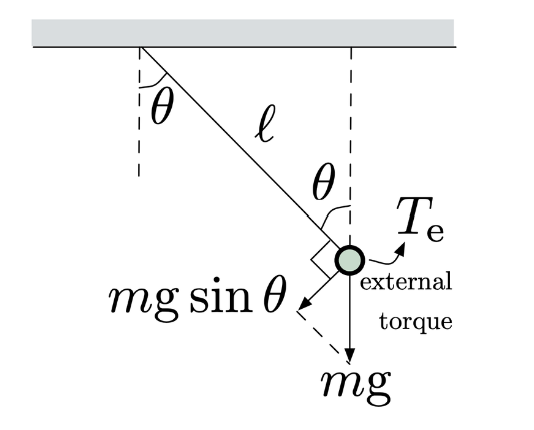

Using the free body diagram we can derive the following equation of motion.
$$ml^2*\ddot \theta = -m*g*\sin(\theta)*l +T_e$$

we then rewrite it in the canonical form
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l}*\sin(\theta_1) + \frac{T_e}{m*l^2}
\end{aligned}
$$
where we use the notation $\theta_1  = \theta, \theta_2 = \dot\theta_1$.

We then linearise the system around an equilibrium point ($\theta_1, \theta_2, T_e$) = (0,0,0), with a help of symbolic calculus (see the code below) and get a linear time invariant model
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l} + \frac{T_e}{m*l^2}
\end{aligned}
$$

In [18]:
#profite from symbolic calculus do easy the math part
import sympy as sp
m, l, g, Te = sp.symbols('m l g Te')
theta1, theta2, dottheta2 = sp.symbols('theta1 theta2 dottheta2')

# Define the differential equations of the system
eq1 = m*l*l* dottheta2 + m*g*sp.sin(theta1)*l - Te

# Solve for the first derivative of theta1 (angular velocity)
dotthet2_sol = sp.solve(eq1, dottheta2)[0]

# Solve for the first derivative of y1 (linear velocity)
dottheta2_sol = sp.simplify(sp.solve(eq1, dottheta2)[0])

# Define the state-space representation of the system dynamics
f1 = theta2
f2 = dotthet2_sol
f = sp.Matrix([f1, f2])

# Define state and control variables
variables_x = sp.Matrix([theta1,theta2])
variables_u = sp.Matrix([Te])

# Compute the Jacobian matrices of the system
jacobian_A = sp.simplify(f.jacobian(variables_x).subs([(theta1,0), (theta2,0)]))
jacobian_B = sp.simplify(f.jacobian(variables_u).subs([(theta1,0), (theta2,0)]))

In [19]:
jacobian_B

Matrix([
[         0],
[1/(l**2*m)]])

In [20]:
jacobian_A

Matrix([
[   0, 1],
[-g/l, 0]])

## TODO
1. Let fisrt consider the system without control ($T_e = 0$). Plot the trajectories of linear and nonlinear systems for
   $\theta^0 = (0.1, 0)$ and  $\theta^0 = (1, 0).$ What kind of conclusion could you make when analyzing the simulation's result?

ANSWER: The linear system is a good model when the initial angle is small as it's closer to the non-linear system's behavior in this case, nevertheless, when the initial angle is bigger, there is a bigger difference between the outputs of those systems. 

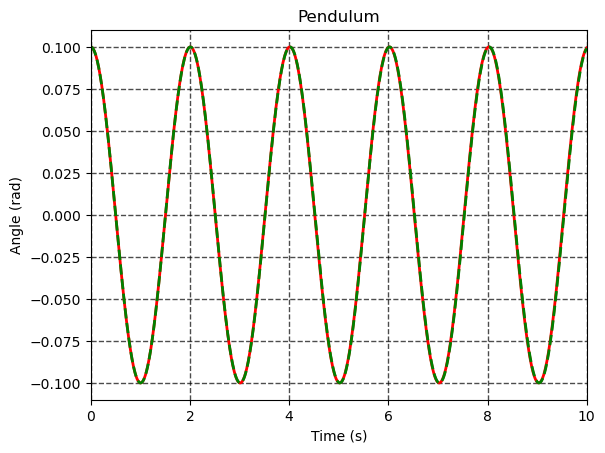

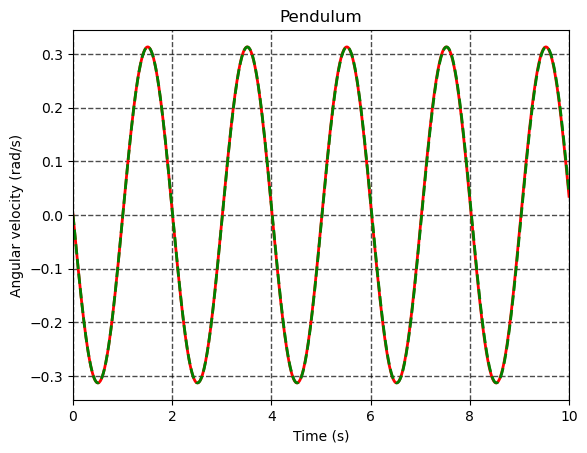

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1
l = 1
g = 9.8

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

x0 = np.array([0.1, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

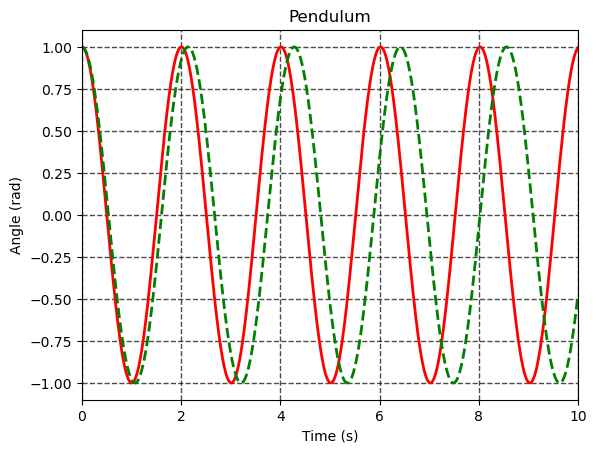

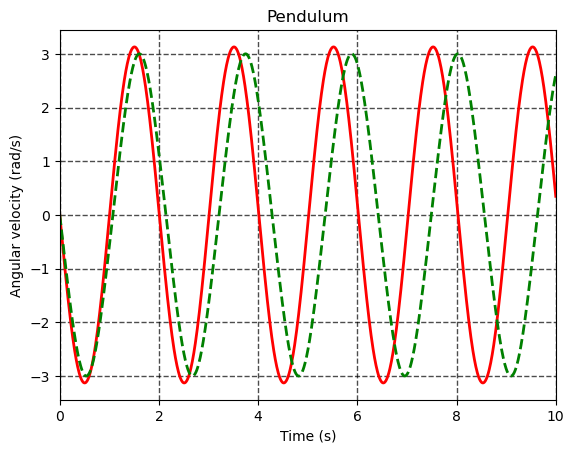

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1
l = 1
g = 9.8

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

x0 = np.array([1, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

2. Let $\theta^0 = (0, 0)$, play with different control inputs, and look at how they affect linear and nonlinear systems correspondingly. What kind of conclusion can you make from this?

ANSWER: With a sinusoid input, both systems have similar behaviors but with different amplitudes, whe can see that the waves are in phase. Inspite of that, the lines diverge a lot in ther heights.

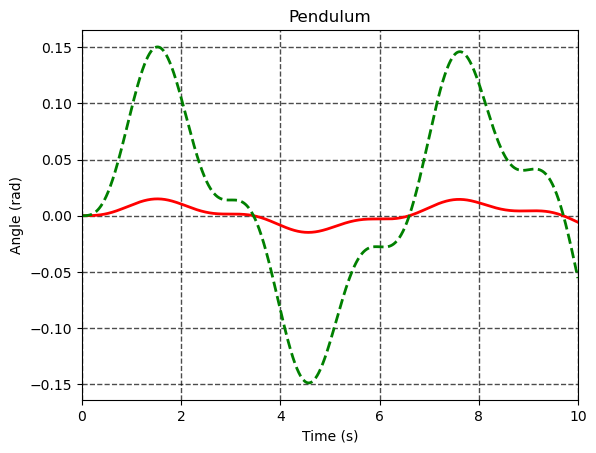

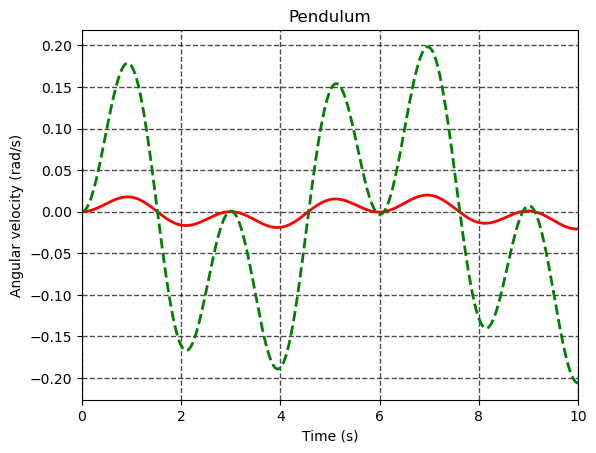

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1
l = 1
g = 9.8

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return np.sin(t)*0.1 # Control input

x0 = np.array([0, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

## Ex 4. Dynamic modeling of an inverted pendulum on the cart

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

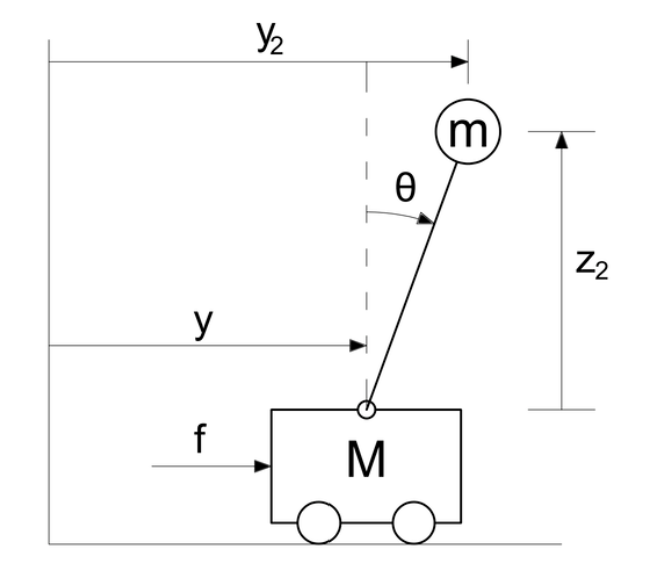

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinates
    
    (theta)   angle between the pendulum and the vertical axis


## TODO
1) Show that the inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$
$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$

If you find it difficult to derive the equations yourself, please, watch the following video: 
https://www.youtube.com/watch?v=kXLjs5aW2uE

or, alternatively, check the following tutorial https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling



ANSWER:
To derive the Equations of Motion (EoM), we define the kinetic energy ($T$) and potential energy ($V$).

**Kinematics:**
* Cart position: $x_c = y$
* Pendulum mass position: $x_m = y + l\sin\theta$, $y_m = l\cos\theta$
* Velocities: $\dot{x}_m = \dot{y} + l\dot{\theta}\cos\theta$, $\dot{y}_m = -l\dot{\theta}\sin\theta$

**Energy Equations:**
* $T = \frac{1}{2}M\dot{y}^2 + \frac{1}{2}m(\dot{x}_m^2 + \dot{y}_m^2) + \frac{1}{2}I\dot{\theta}^2$
* $V = mgl\cos\theta$

The Lagrangian is $L = T - V$. Applying the Euler-Lagrange equation $\frac{d}{dt}(\frac{\partial L}{\partial \dot{q}_i}) - \frac{\partial L}{\partial q_i} = Q_i$, we obtain:

1. $(M + m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta - ml\dot{\theta}^2\sin\theta = F$
2. $ml\cos\theta\ddot{y} + (I + ml^2)\ddot{\theta} - mgl\sin\theta = 0$


2) Rewrite the system equation in a canonical form $\dot x = f(x,u),$ where state vector $x = (y,\theta,\dot y,\dot\theta)$.

Defining the state vector as $\mathbf{x} = [y, \theta, \dot{y}, \dot{\theta}]^T$, we have:

$ \dot{x} = \begin{bmatrix}
   \dot{y}\\ \dot{\theta} \\ \ddot{y}\\  \ddot{\theta}\
 \end{bmatrix} =\begin{bmatrix}
   \dot{x_1}\\ \dot{x_2} \\ \dot{x_3}\\  \dot{x_4}\
 \end{bmatrix}  = \begin{bmatrix}
   {x_3}\\ x_4 \\ f_3(\theta,y,t,u)\\  f_4(\theta,y,t,u)\
 \end{bmatrix}$

3) Find an equlibrium point. Linearise the system equations by finding the Jacobian matrix.

The equilibrium pint happens when $\dot{x} = 0$, and we can ue the unstable equilibrium point $\theta = 0$ to linearize using the Jacobian matrices:
$$A = \frac{\partial f}{\partial \mathbf{x}}, \quad B = \frac{\partial f}{\partial u}$$

4) Simulate trajectories of the uncontrolled nonlinear system and its linear approximation for different initial vectors. What can you say about system dynamics?

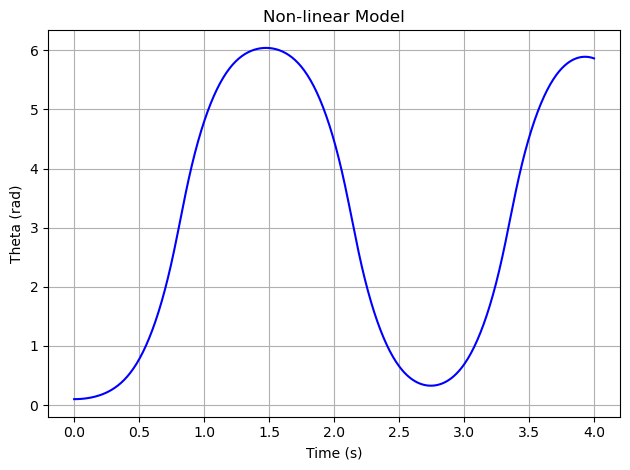

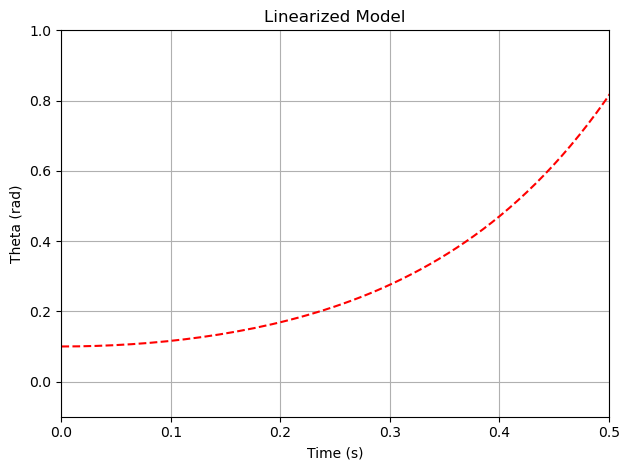

In [20]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

M, m, l, I, g, b = sp.symbols('M m l I g b')
F_sym = sp.symbols('F')
y, theta, dy, dtheta = sp.symbols('y theta dy dtheta')
ddy, ddtheta = sp.symbols('ddy ddtheta')

eq1 = sp.Equality((M + m)*ddy + b*dy + m*l*ddtheta*sp.cos(theta) - m*l*dtheta**2*sp.sin(theta), F_sym)
eq2 = sp.Equality(m*l*sp.cos(theta)*ddy + (I + m*l**2)*ddtheta - m*g*l*sp.sin(theta), 0)

sol = sp.solve([eq1, eq2], [ddy, ddtheta], dict=True)[0] 
f3 = sol[ddy]
f4 = sol[ddtheta]

states = sp.Matrix([y, theta, dy, dtheta])
f_vec = sp.Matrix([dy, dtheta, f3, f4])

A_nonlinear = f_vec.jacobian(states)
B_nonlinear = f_vec.jacobian([F_sym])

valores_num = {M: 0.5, m: 0.2, l: 0.3, b: 0.1, I: 0.006, g: 9.81}

A_lin_num = np.array(A_nonlinear.subs(valores_num).subs({theta: 0, dy: 0, dtheta: 0, F_sym: 0})).astype(np.float64)
B_lin_num = np.array(B_nonlinear.subs(valores_num).subs({theta: 0})).astype(np.float64)

func_f_nonlinear = sp.lambdify((y, theta, dy, dtheta, F_sym), f_vec.subs(valores_num), 'numpy')

def nonlinear_ode(x, t, force):
    return func_f_nonlinear(*x, force).flatten()

def linear_ode(x, t, force):
    return (A_lin_num @ x + B_lin_num.flatten() * force)

t = np.linspace(0, 4, 500)
x0 = [0, 0.1, 0, 0]
force = 0

res_nl = odeint(nonlinear_ode, x0, t, args=(force,))
res_l = odeint(linear_ode, x0, t, args=(force,))

plt.plot(t, res_nl[:, 1], 'b')
plt.title('Non-linear Model')
plt.ylabel('Theta (rad)')
plt.xlabel('Time (s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.plot(t, res_l[:, 1], 'r--')
plt.title('Linearized Model')
plt.xlim([t[0], 0.5])  # Zoom in on the initial response
plt.ylim([-0.1, 1])  # Set y-limits for better visibility
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()